In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap,LocallyLinearEmbedding
from scipy import spatial, stats
import time
from local_score import *

%matplotlib inline

In [34]:
import umap
# import humap

## Helper methods

In [10]:
def execute_LocallyLinearEmbedding(X, y):
    lle_embedding = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
    return lle_embedding.fit_transform(X, y)

In [11]:
def execute_Isomap(X, y):
    isomap_embedding = Isomap(n_components=2)
    return isomap_embedding.fit_transform(X, y)

In [12]:
def execute_umap(X, y):
    return umap.UMAP().fit(X, y).embedding_

In [35]:
def execute_humap(X, y):
    hUmap = humap.HUMAP()
    hUmap.fit(X, y)
    return hUmap.transform(0)

In [3]:
def plot_2d_scatter(X, y, title):
    fig, plot = plt.subplots()
    fig.set_size_inches(8, 8)
    plt.prism()
    
    for i in range(10):
        digit_indeces = (y == i)
        dim1 = X[digit_indeces,0]
        dim2 = X[digit_indeces,1]
        plot.scatter(dim1, dim2, label=i)
    
    plot.set_xticks(())
    plot.set_yticks(())
    
    plt.tight_layout()
    plt.legend()
    plt.title(title)
    plt.show()

In [4]:
def shepard_correlation(D_high, D_low):
    correlation = stats.spearmanr(D_high, D_low)[0]
    fig, plot = plt.subplots()
    fig.set_size_inches(8, 8)
    plt.prism()
    plot.scatter(D_high[::10000], D_low[::10000])
    plt.title(f'Shepard Correlation - {correlation}')
    plt.show()

In [5]:
def run(X, y, func):
    times = []
    for i in np.linspace(0.1, 1, 10):
        start = time.time()
        size = int(i*X.shape[0])
        tmp_X = X[:size]
        tmp_y = y[:size]
        embedding = func(tmp_X, tmp_y)
        times.append(time.time() - start)  
    return embedding, times

In [40]:
def plot_time_comparison(exec_times):
    fig, plot = plt.subplots()
    fig.set_size_inches(8, 8)
    sizes = np.linspace(0.1, 1, 10)
    for label, exec_time in exec_times.items():
        plot.plot(sizes[:len(exec_time)], exec_time, label=label)
    plt.legend()
    plt.show()

# FMNIST

In [5]:
X_fmnist = pd.read_csv('fmnist_data.csv').to_numpy()
y_fmnist = pd.read_csv('fmnist_labels.csv').to_numpy().flatten()
D_high_fmnist = spatial.distance.pdist(X_fmnist[:10000], 'euclidean')

### LLE

In [14]:
fmnist_lle_embedding, fmnist_lle_times = run(X_fmnist, y_fmnist, execute_LocallyLinearEmbedding)

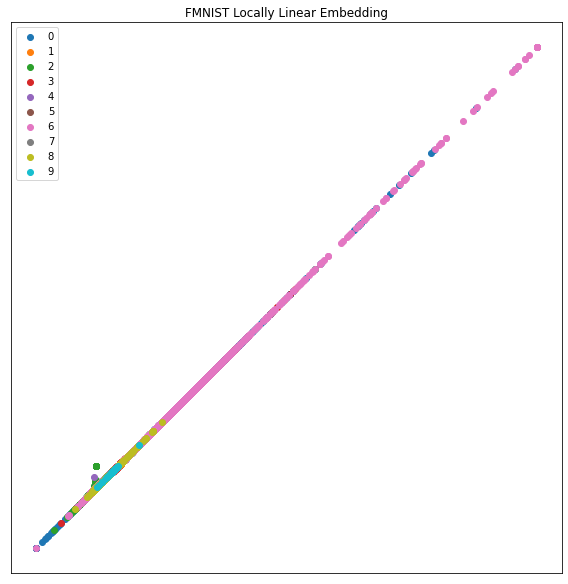

In [18]:
plot_2d_scatter(fmnist_lle_embedding, y_fmnist, 'FMNIST Locally Linear Embedding')

In [26]:
D_low_fmnist_lle = spatial.distance.pdist(fmnist_lle_embedding[:10000], 'euclidean')

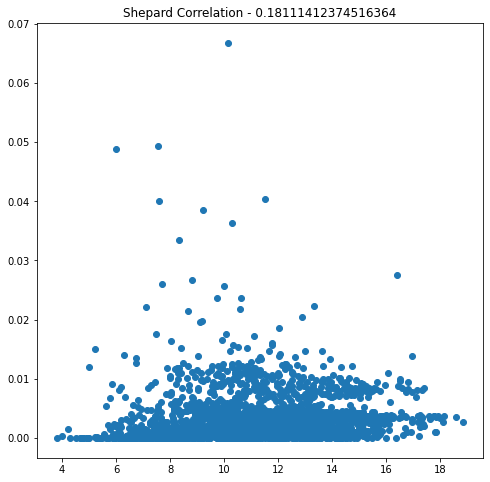

In [25]:
shepard_correlation(D_high_fmnist, D_low_fmnist_lle)

### Isomap

In [5]:
fmnist_isomap_embedding, fmnist_isomap_times = run(X_fmnist, y_fmnist, execute_Isomap)

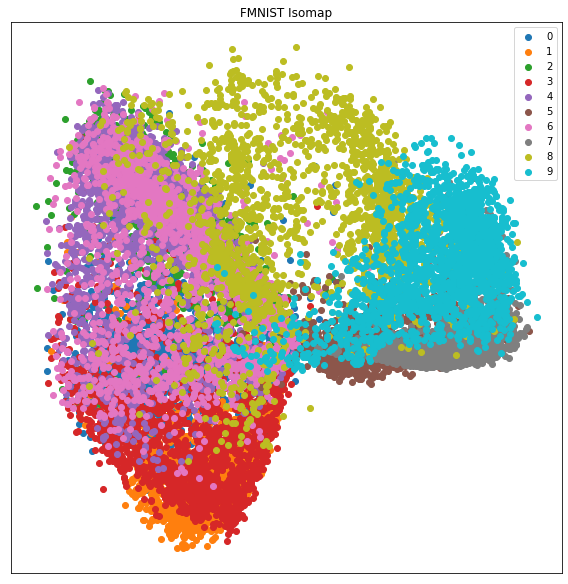

In [11]:
plot_2d_scatter(fmnist_isomap_embedding, y_fmnist[:20999], 'FMNIST Isomap')

In [10]:
D_low_fmnist_isomap = spatial.distance.pdist(fmnist_isomap_embedding[:10000], 'euclidean')

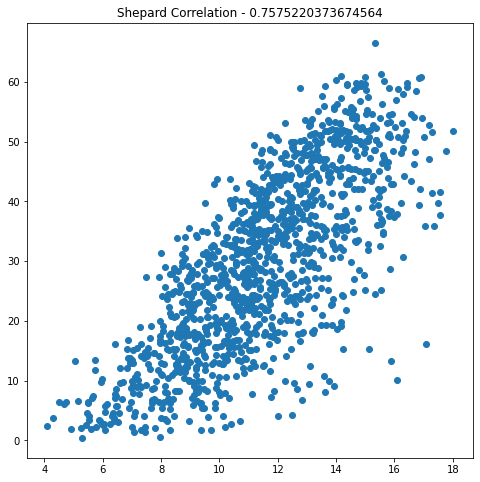

In [12]:
shepard_correlation(D_high_fmnist_isomap, D_low_fmnist_isomap)

### HUMAP

In [78]:
fmnist_humap_embedding, fmnist_humap_times = run(X_fmnist, y_fmnist, execute_humap)

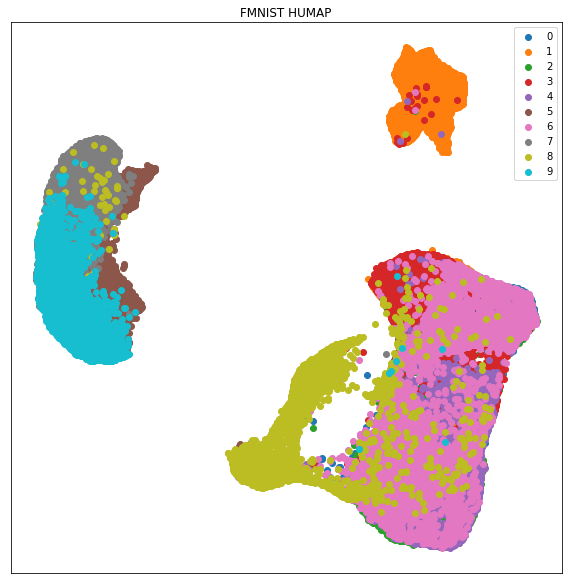

In [79]:
plot_2d_scatter(fmnist_humap_embedding, y_fmnist, 'FMNIST HUMAP')

In [16]:
D_low_fmnist_humap = spatial.distance.pdist(fmnist_humap_embedding[:10000], 'euclidean')

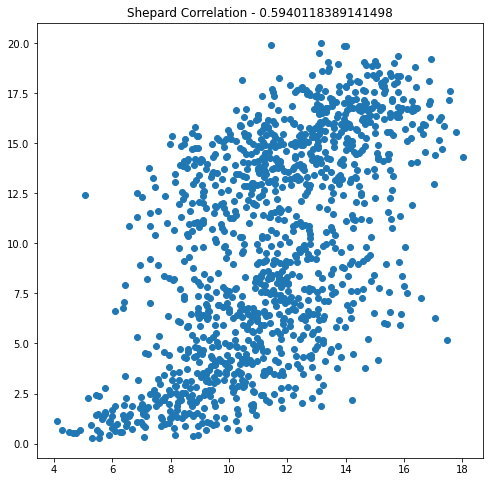

In [17]:
shepard_correlation(D_high_fmnist_isomap, D_low_fmnist_humap)

## IVHD

In [9]:
fmnist_ivhd_embedding = np.load("fmnist_ivhd.npy")
fmnist_ivhd_times = np.load("fmnist_ivhd_times.npy")

In [20]:
D_low_fmnist_ivhd = spatial.distance.pdist(fmnist_ivhd_embedding[:10000], 'euclidean')

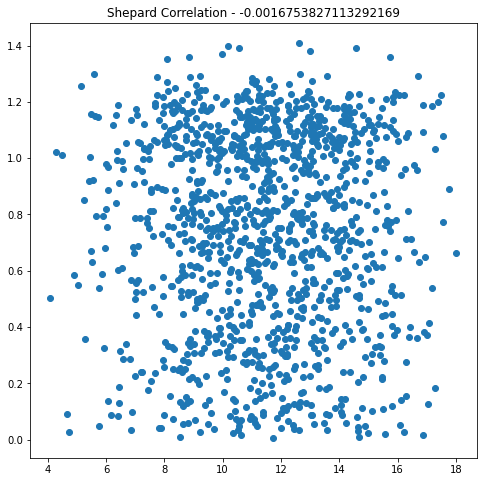

In [21]:
shepard_correlation(D_high_fmnist_isomap, D_low_fmnist_ivhd)

### Metryki

Calculating d_hd
LLE
Calculating d_hd
Isomap
Calculating d_hd
HUMAP
Calculating d_hd
IVHD
Finished.


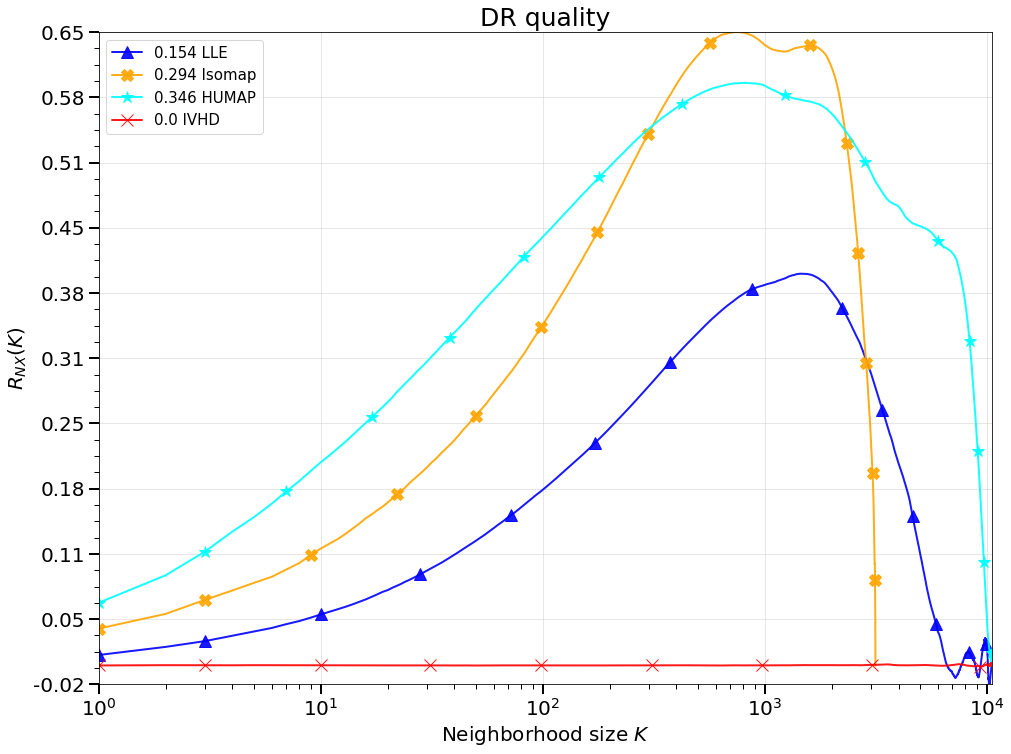

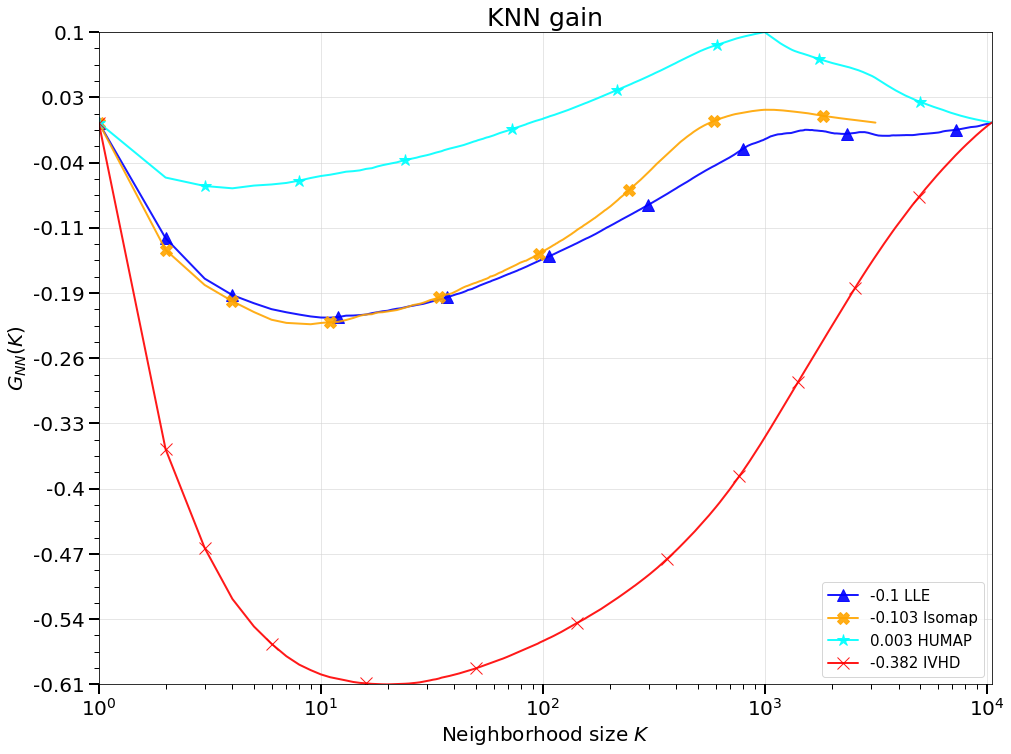

In [10]:
fmnist_local_score = LocalMetric()
fmnist_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_lle_embedding,
    X_hds=X_fmnist,
    labels=y_fmnist,
    method_name="LLE"
)
fmnist_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_isomap_embedding,
    X_hds=X_fmnist[:20999],
    labels=y_fmnist[:20999],
    method_name="Isomap"
)
fmnist_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_humap_embedding,
    X_hds=X_fmnist,
    labels=y_fmnist,
    method_name="HUMAP"
)
fmnist_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_ivhd_embedding,
    X_hds=X_fmnist,
    labels=y_fmnist,
    method_name="IVHD"
)

fmnist_local_score.visualize()

## Porownianie czasu

In [30]:
plot_time_comparison(fmnist_lle_times, fmnist_isomap_times, fmnist_humap_times, fmnist_ivhd_times)

NameError: name 'fmnist_lle_times' is not defined

# RCV Reuters

In [7]:
X_reuters = pd.read_csv('reuters_data.csv').to_numpy()
y_reuters = pd.read_csv('reuters_labels.csv').to_numpy().flatten()

## LLE

In [8]:
reuters_lle_embedding, reuters_lle_times = run(X_reuters, y_reuters, execute_LocallyLinearEmbedding)

MemoryError: Unable to allocate 48.2 GiB for an array with shape (80440, 80440) and data type float64

## Isomap

In [6]:
reuters_isomap_embedding, reuters_isomap_times = run(X_reuters, y_reuters, execute_Isomap)

MemoryError: Unable to allocate 48.2 GiB for an array with shape (80440, 80440) and data type float64

## HUAMP

In [ ]:
reuters_humap_embedding, reuters_humap_times = run(X_reuters, y_reuters, execute_humap)

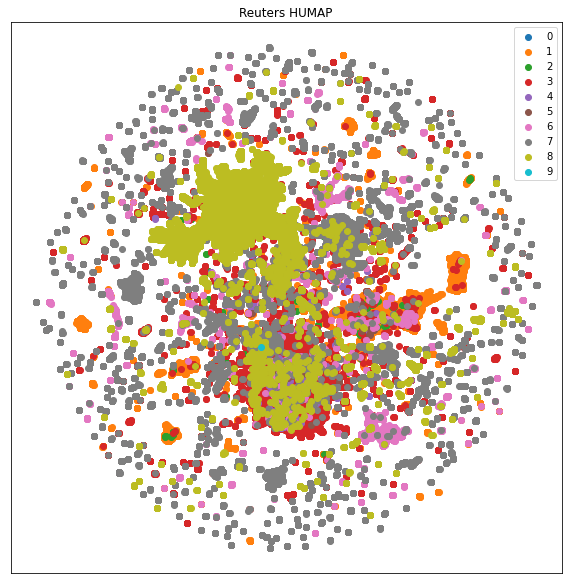

In [31]:
plot_2d_scatter(reuters_humap_embedding, y_reuters, 'Reuters HUMAP')

In [33]:
D_hight_reuters = spatial.distance.pdist(X_reuters[:10000], 'euclidean')

In [32]:
D_low_reuters_humap = spatial.distance.pdist(reuters_humap_embedding[:10000], 'euclidean')

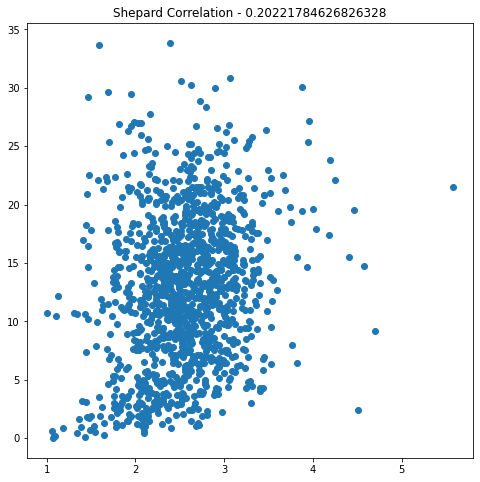

In [34]:
shepard_correlation(D_hight_reuters, D_low_reuters_humap)

## IVHD 

In [9]:
reuters_ivhd_embedding = np.load("reuters_ivhd.npy")
reuters_ivhd_times = np.load("reuters_ivhd_times.npy")

In [36]:
D_low_reuters_ivhd = spatial.distance.pdist(reuters_ivhd_embedding[:10000], 'euclidean')

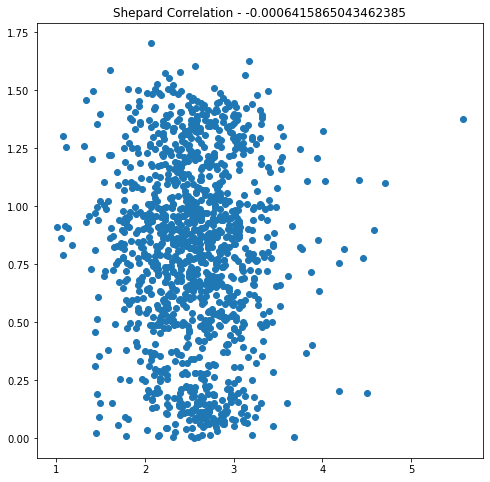

In [37]:
shepard_correlation(D_hight_reuters, D_low_reuters_ivhd)

## Metryki

Calculating d_hd
HUMAP
Calculating d_hd
IVHD
Finished.


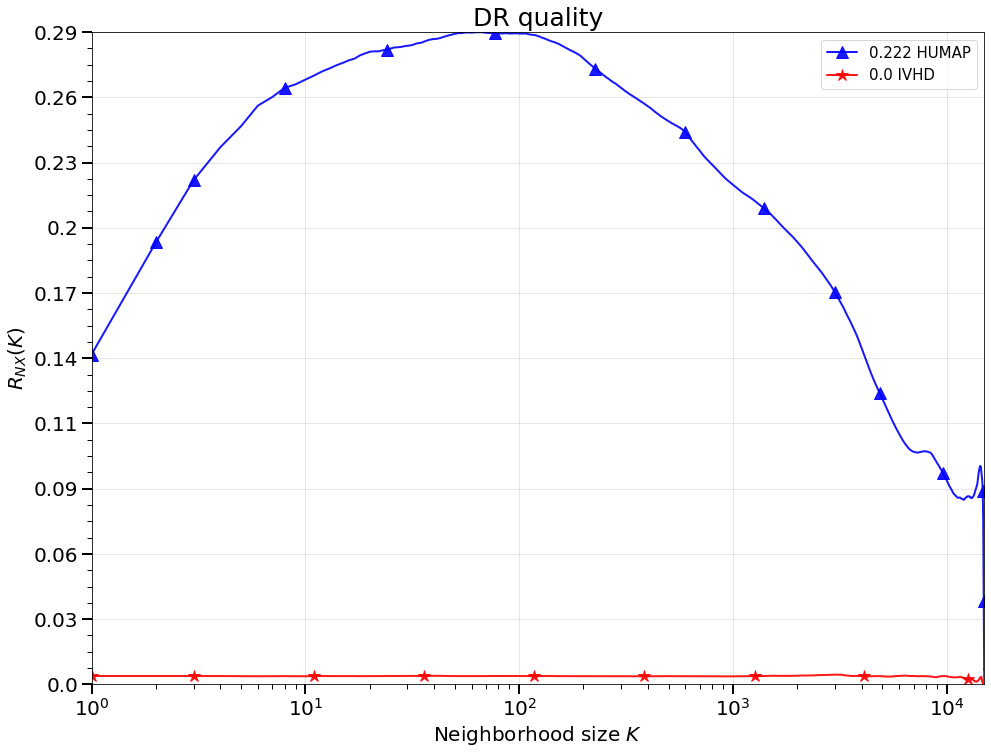

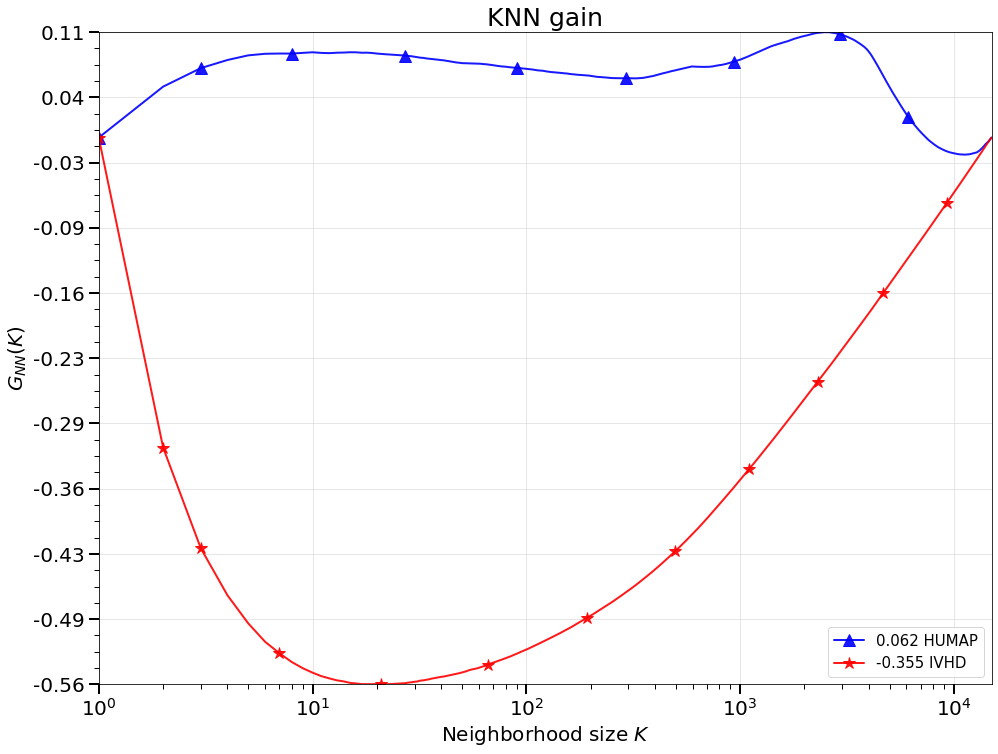

In [11]:
reuters_local_score = LocalMetric()
reuters_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_humap_embedding[:100000],
    X_hds=X_reuters[:100000],
    labels=y_reuters[:100000],
    method_name="HUMAP"
)
reuters_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_ivhd_embedding[:100000],
    X_hds=X_reuters[:100000],
    labels=y_reuters[:100000],
    method_name="IVHD"
)

reuters_local_score.visualize()

## Porownanie czasu

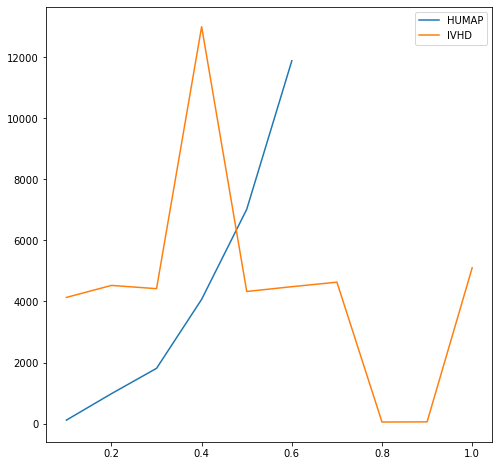

In [41]:
plot_time_comparison({"HUMAP": reuters_humap_times, "IVHD": reuters_ivhd_times})

# SMALLNORB

In [12]:
X_smallnorb = pd.read_csv('smallnorb_data.csv').to_numpy()
y_smallnorb = pd.read_csv('smallnorb_labels.csv').to_numpy().flatten()

## LLE

In [11]:
smallnorb_lle_embedding, smallnorb_lle_times = run(X_smallnorb, y_smallnorb, execute_LocallyLinearEmbedding)

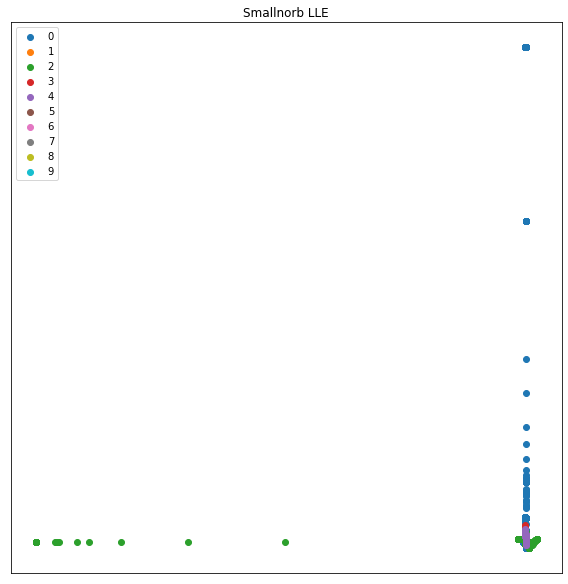

In [43]:
plot_2d_scatter(smallnorb_lle_embedding, y_smallnorb, 'Smallnorb LLE')

In [26]:
D_hight_smallnorb = spatial.distance.pdist(X_smallnorb[:10000], 'euclidean')

In [27]:
D_low_smallnorb_lle = spatial.distance.pdist(smallnorb_lle_embedding[:10000], 'euclidean')

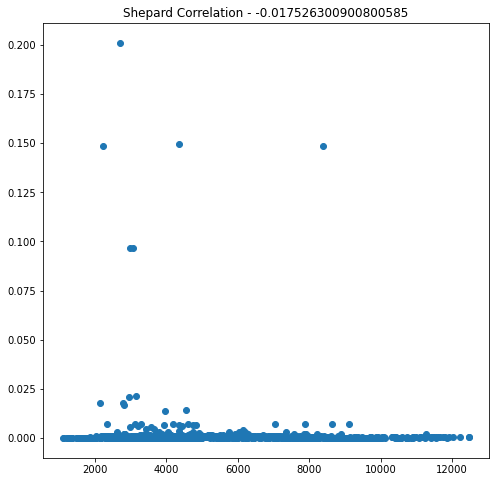

In [42]:
shepard_correlation(D_hight_smallnorb, D_low_smallnorb_lle)

## Isomap

In [15]:
smallnorb_isomap_embedding, smallnorb_isomap_times = run(X_smallnorb, y_smallnorb, execute_Isomap)

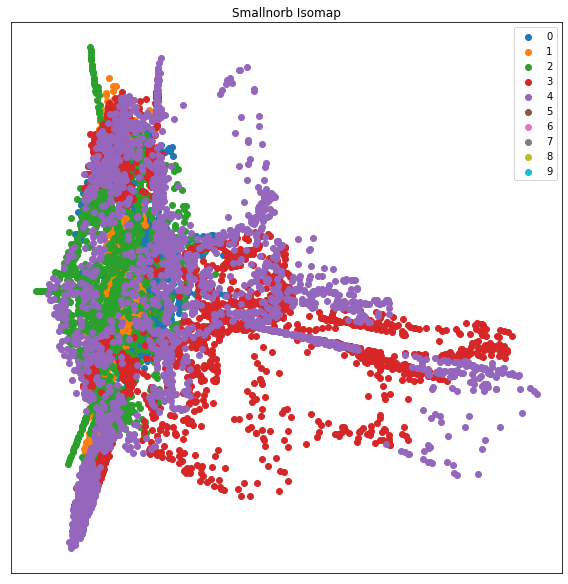

In [49]:
plot_2d_scatter(smallnorb_isomap_embedding, y_smallnorb[:14580], 'Smallnorb Isomap')

In [50]:
D_low_smallnorb_isomap = spatial.distance.pdist(smallnorb_isomap_embedding[:10000], 'euclidean')

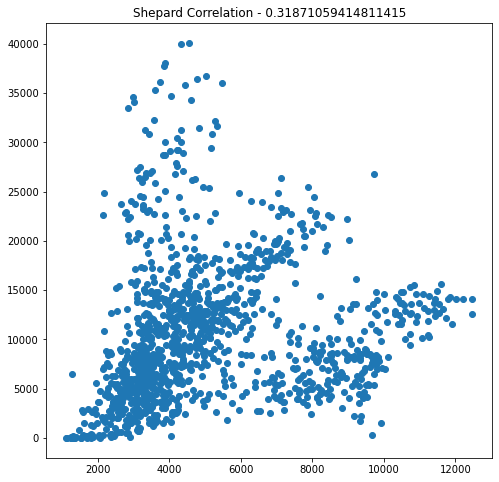

In [51]:
shepard_correlation(D_hight_smallnorb, D_low_smallnorb_isomap)

## HUMAP

In [ ]:
smallnorb_humap_embedding, smallnorb_humap_times = run(X_smallnorb, y_smallnorb, execute_humap)

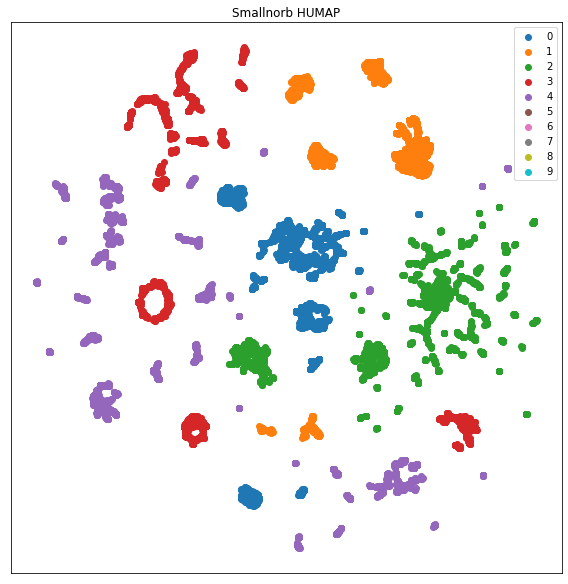

In [61]:
plot_2d_scatter(smallnorb_humap_embedding, y_smallnorb, 'Smallnorb HUMAP')

In [59]:
D_low_smallnorb_humap = spatial.distance.pdist(smallnorb_humap_embedding[:10000], 'euclidean')

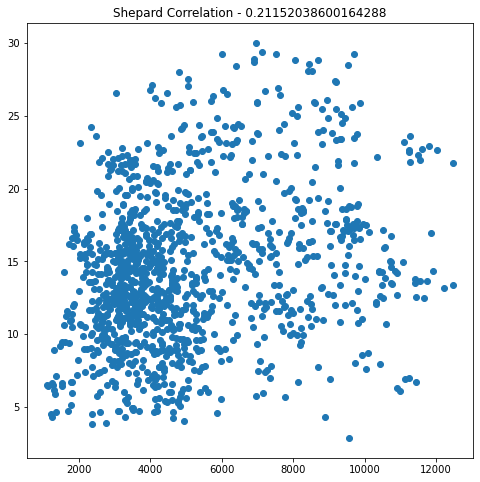

In [60]:
shepard_correlation(D_hight_smallnorb, D_low_smallnorb_humap)

## IVHD

In [52]:
smallnorb_ivhd_embedding = np.load('smallnorb_ivhd.npy')
smallnorb_ivhd_times = np.load('smallnorb_ivhd_times.npy')

In [55]:
D_low_smallnorb_ivhd = spatial.distance.pdist(smallnorb_ivhd_embedding[:10000], 'euclidean')

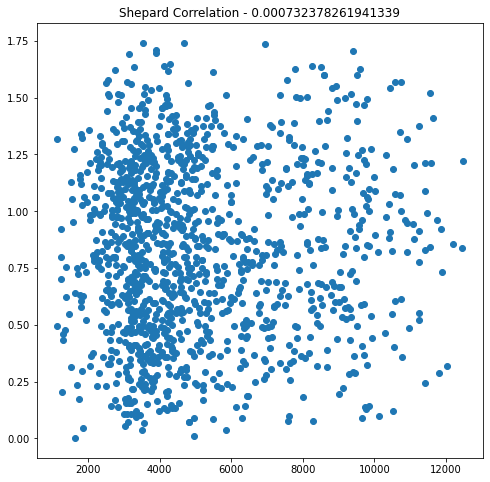

In [56]:
shepard_correlation(D_hight_smallnorb, D_low_smallnorb_ivhd)

## Metryki 

Calculating d_hd
LLE
Calculating d_hd
Isomap
Calculating d_hd
HUMAP
Calculating d_hd
IVHD
Finished.


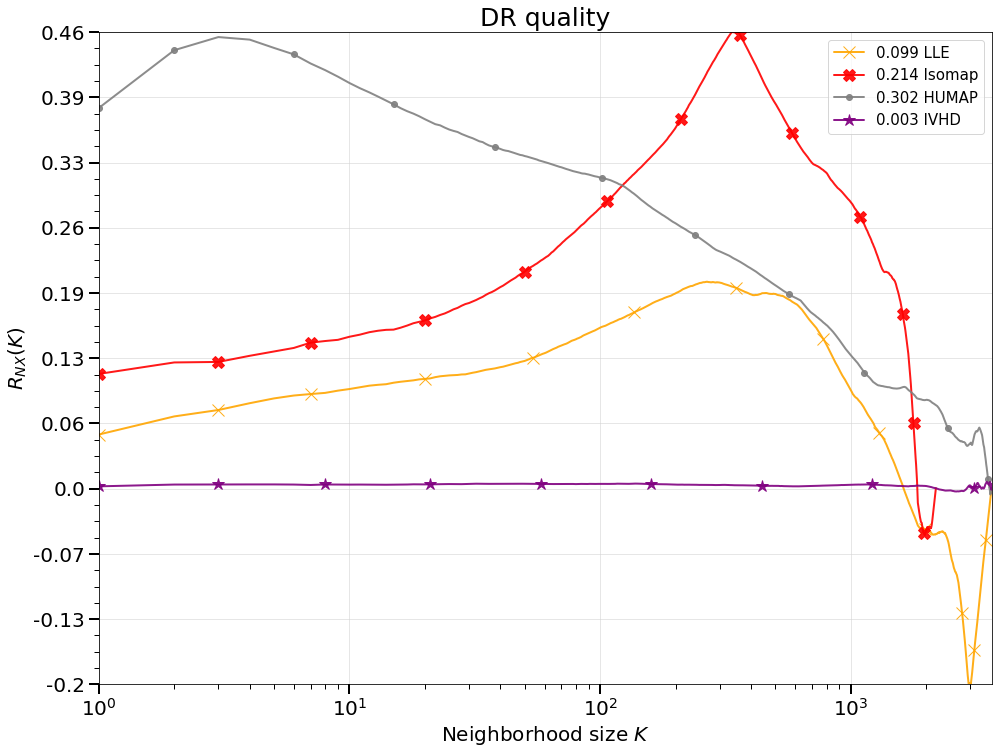

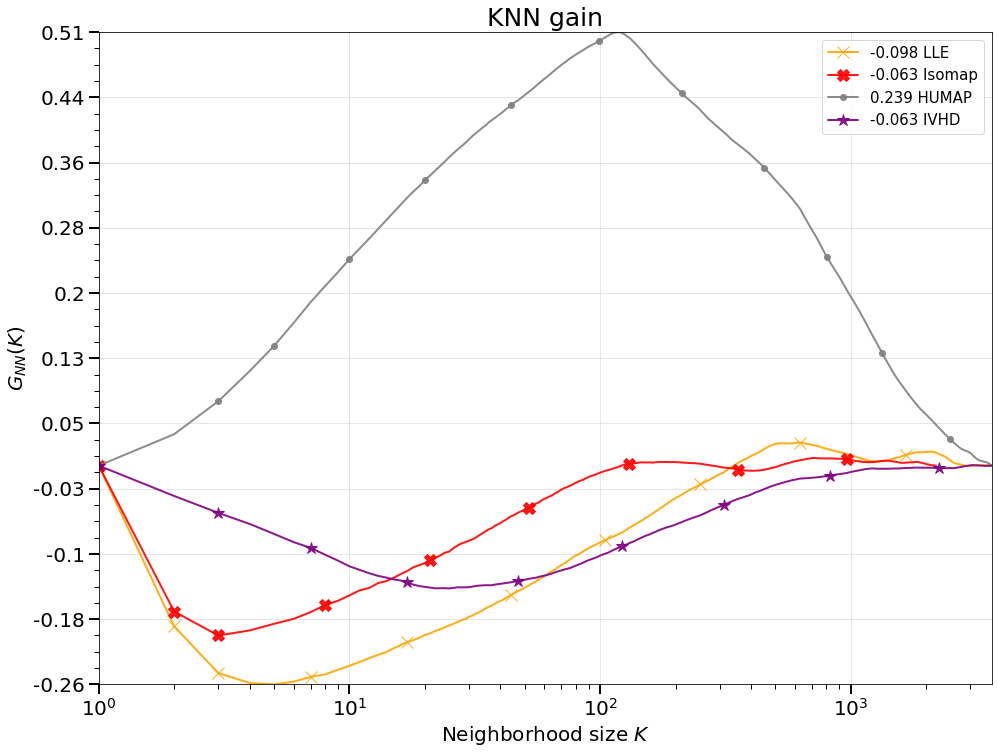

In [66]:
smallnorb_local_score = LocalMetric()
smallnorb_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=smallnorb_lle_embedding,
    X_hds=X_smallnorb,
    labels=y_smallnorb,
    method_name="LLE"
)
smallnorb_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=smallnorb_isomap_embedding,
    X_hds=X_smallnorb[:14580],
    labels=y_smallnorb[:14580],
    method_name="Isomap"
)
smallnorb_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=smallnorb_humap_embedding,
    X_hds=X_smallnorb,
    labels=y_smallnorb,
    method_name="HUMAP"
)
smallnorb_local_score.calculate_knn_gain_and_dr_quality(
    X_lds=smallnorb_ivhd_embedding[:24300],
    X_hds=X_smallnorb,
    labels=y_smallnorb,
    method_name="IVHD"
)

smallnorb_local_score.visualize()

## Porownanie czasow

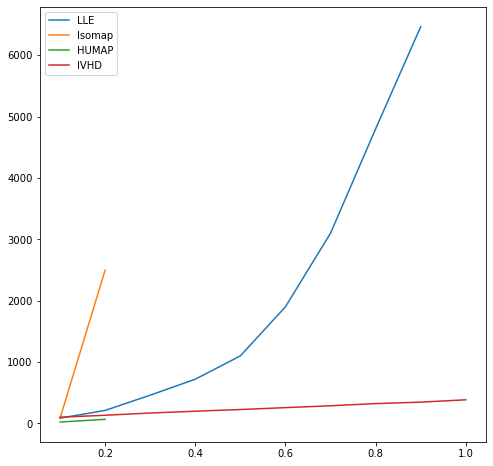

In [69]:
plot_time_comparison({"LLE": smallnorb_lle_times, 
                      "Isomap": smallnorb_isomap_times, 
                      "HUMAP": smallnorb_humap_times, 
                      "IVHD": smallnorb_ivhd_times})